### Multiple Linear Regression:
- It models the relationship between a dependent variable and two (or) more independent variable.
- Formula - y = β0 + β1X1 + β2X2 + β3X3 + β4X4 ..... + βnXn
- Where,
   - y - dependent variable.
   - X1, X2, X3, .... Xn - independent variables.
   - β0 - Intercept.
   - β1 ,β2 ,⋯βn - slopes.
  

### Multicollinearity in Multiple Linear Regression:
- It arises when two (or) more independent variables are highly correlated with each other.
- This make it difficult to find the individual contribution of each variable to the dependent variable.
#### To detect multicollinearity we can use:
#### 1. Correlation Matrix:
- A Correlation matrix helps to find relationships between independent variables.
- High correlations (close to 1 (or)-1).
#### 2. VIF (Variance Inflation Factor):
- VIF quantifies how much the variance of a regression coefficient increases if predictors are correlated.
- A high VIF typically above 10 indicates multicollinearity.

### Assumptions of Multiple Regression Model:
#### 1. Linearity:
- Relationship between dependent variable and independent variables should be linear.
#### 2. Homoscedasticity:
- Variance of errors should remain constant across all levels of independent variables.
#### 3. Multivariate Normality:
- Residuals should follow a normal distribution.
#### 4. No Multicollinearity:
- Independent variables should not be highly correlated.

### Implementation of Multiple Linear Regression Model
- Calfornia Housing dataset which includes -
  - Features - median income, average rooms.
  - target - housing prices.

### Step 1 - Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

### Step 2: Loading Dataset
- Load california Housing dataset from sklearn.datasets.
- Dataset contains features such as median income, average rooms stored in x.
- Target i.e house prices is stored in y.

In [5]:
california_housing = fetch_california_housing()

X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

### Step 3: Selecting Features for Visualization
- Choose two features MedInc(median income) and AveRooms (average rooms) to simplify visualization in two dimensions.

In [6]:
X = X[['MedInc', 'AveRooms']]

### Step 4: Train-Test Split
- We will use 80% for training and 20% for testing.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Initializing and Training Model
- Create multilinear regression using Linear Regression from scikit-learn and train it on the training data.

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 6: Making Predictions
- Using the trained model to predict house prices on the test data.

In [10]:
y_pred = model.predict(X_test)

### Step 7: Visualizing Best Fit Line in 3D
- blue points - represent actual house prices based on MedInc and AveRooms.
- Red points - represent best-fit plane predicted by the model.
- np.linespace() - Generates an array of evenly spaced values over a specific intervel.
- np.meshgrid(X,Y) - Generates two 2-D Arrays.Used to create a rectangular grid from two (or) more one-dimensional arrays representing co-ordinate vectors.
- np.c_ - function concatenates the flattened x1 and x2 array column-wise into a 2D array where each row represents a coordinate pair.
- Finally,
  - reshape(x1.shape) - restores the prediction array to the original shape of the meshgrid.
- ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100) -
- where,
  - x1, x2,z - are 2D arrays. Data values.
  - color - Color of the surface patches.
  - alpha=0.5 - set 50% transparency.
  - rstride and cstride - useful for reducing computational load and improving rendering speed when plotting complex surfaces.

C:\Users\techs\anaconda3\New folder\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


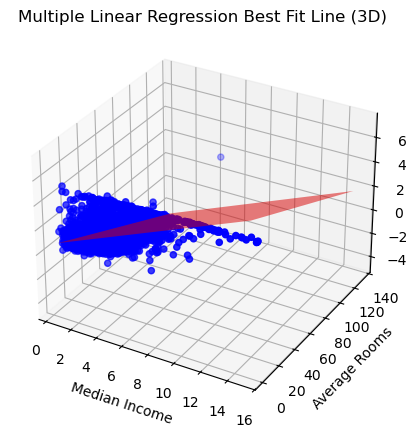

In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_test['MedInc'], X_test['AveRooms'], y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100)
x2_range = np.linspace(X_test['AveRooms'].min(), X_test['AveRooms'].max(), 100)

x1, x2 = np.meshgrid(x1_range, x2_range)
z=model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)
ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()